**Importando Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Carregando dados**

In [ ]:
df = pd.read_csv('/content/index_1.csv')

**Vizualização inicial dos Dados**

In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df.columns


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [ ]:
df.columns = ['Data', 'Data/Hora', 'Tipo de Pagamento', 'Cartão', 'Dinheiro', 'Tipo de Café']


In [ ]:
print(df.columns)


Index(['Data', 'Data/Hora', 'Tipo de Pagamento', 'Cartão', 'Dinheiro',
       'Tipo de Café'],
      dtype='object')


**Qual café mais vendido?**

In [ ]:
mais_vendidos = df['Tipo de Café'].value_counts()


In [ ]:
print("Tipo de café mais vendido:")
print(mais_vendidos.head(1))

Tipo de café mais vendido:
Tipo de Café
Americano with Milk    824
Name: count, dtype: int64


**Qual o hora de maior venda?**

In [ ]:

df['Data/Hora'] = pd.to_datetime(df['Data/Hora'])


df['Hora'] = df['Data/Hora'].dt.hour

vendas_por_hora = df['Hora'].value_counts().sort_index()


hora_mais_vendas = vendas_por_hora.idxmax()
qtd_vendas = vendas_por_hora.max()

print(f'Horário com mais vendas: {hora_mais_vendas}:00 com {qtd_vendas} vendas.')

Horário com mais vendas: 10:00 com 349 vendas.


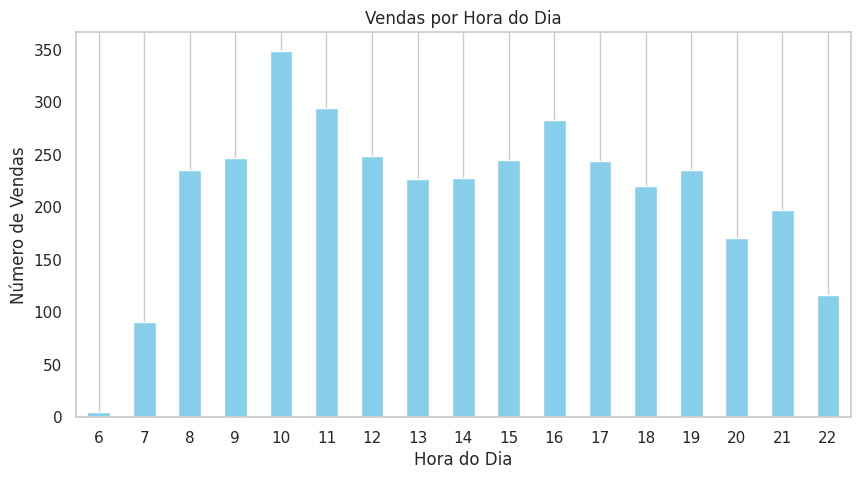

In [ ]:
plt.figure(figsize=(10,5))
vendas_por_hora.plot(kind='bar', color='skyblue')
plt.title('Vendas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Quero saber se o produto mais vendido , ele é o mais vendido no horário de maior venda**

In [ ]:
mais_vendido_geral = df['Tipo de Café'].value_counts().idxmax()


vendas_10h = df[df['Hora'] == 10]


mais_vendido_10h = vendas_10h['Tipo de Café'].value_counts().idxmax()


print(f'Produto mais vendido no geral: {mais_vendido_geral}')
print(f'Produto mais vendido às 10h: {mais_vendido_10h}')

if mais_vendido_geral == mais_vendido_10h:
    print("✅ Sim! O produto mais vendido também é o que mais vende às 10h.")
else:
    print("❌ Não. O produto mais vendido no geral não é o que mais vende às 10h.")

Produto mais vendido no geral: Americano with Milk
Produto mais vendido às 10h: Americano with Milk
✅ Sim! O produto mais vendido também é o que mais vende às 10h.


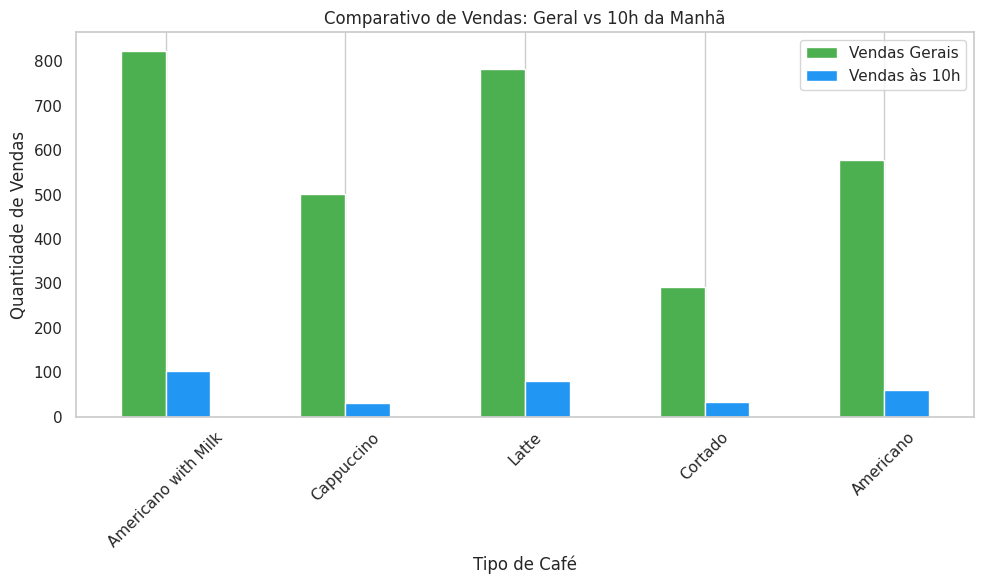

In [ ]:
top_geral = df['Tipo de Café'].value_counts().head(5)


vendas_10h = df[df['Hora'] == 10]

top_10h = vendas_10h['Tipo de Café'].value_counts().head(5)

todos_produtos = set(top_geral.index).union(set(top_10h.index))

comparativo = pd.DataFrame(index=list(todos_produtos))
comparativo['Vendas Gerais'] = top_geral
comparativo['Vendas às 10h'] = top_10h
comparativo = comparativo.fillna(0).astype(int)


comparativo.plot(kind='bar', figsize=(10,6), color=['#4CAF50', '#2196F3'])
plt.title('Comparativo de Vendas: Geral vs 10h da Manhã')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Tipo de Café')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Qual metode pagamento é mais utilizado?**

In [ ]:
contagem_pagamento = df['Tipo de Pagamento'].value_counts()

print("Contagem de métodos de pagamento:")
print(contagem_pagamento)


Contagem de métodos de pagamento:
Tipo de Pagamento
card    3547
cash      89
Name: count, dtype: int64


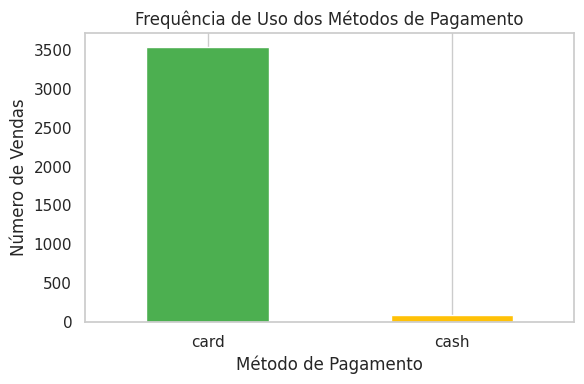

In [ ]:
import matplotlib.pyplot as plt

# Plot
contagem_pagamento.plot(kind='bar', color=['#4CAF50', '#FFC107'], figsize=(6,4))
plt.title('Frequência de Uso dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Qual o tipo de pagamento em cada hora do dia ?**



In [ ]:
vendas_hora_pagamento = df.groupby(['Hora', 'Tipo de Pagamento']).size().reset_index(name='Vendas')

# Gráfico interativo
fig = px.line(
    vendas_hora_pagamento,
    x='Hora',
    y='Vendas',
    color='Tipo de Pagamento',
    markers=True,
    title='Vendas por Hora do Dia por Método de Pagamento',
    labels={'Hora': 'Hora do Dia', 'Vendas': 'Número de Vendas'}
)
fig.update_layout(xaxis=dict(dtick=1))
fig.show()

**Qual o tipo de pagamento em cada tipo de café?**

In [ ]:
# Agrupa por tipo de café e tipo de pagamento
vendas_cafe_pagamento = df.groupby(['Tipo de Café', 'Tipo de Pagamento']).size().reset_index(name='Vendas')

# Gráfico interativo
fig = px.bar(
    vendas_cafe_pagamento,
    x='Tipo de Café',
    y='Vendas',
    color='Tipo de Pagamento',
    barmode='group',
    title='Vendas por Tipo de Café e Método de Pagamento',
    labels={'Tipo de Café': 'Tipo de Café', 'Vendas': 'Número de Vendas'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


**Qual foi o dia que mais vendeu ?**

In [ ]:
# Convert the 'Data' column to datetime objects
df['Data'] = pd.to_datetime(df['Data'])

# Now you can proceed with the rest of your code as is
vendas_por_dia = df['Data'].value_counts().sort_index()

# Dia com mais vendas
dia_max_vendas = vendas_por_dia.idxmax()
qtd_max_vendas = vendas_por_dia.max()

# Exibe o resultado
print(f'Dia com mais vendas: {dia_max_vendas.strftime("%d/%m/%Y")} com {qtd_max_vendas} vendas.')

Dia com mais vendas: 11/10/2024 com 26 vendas.
